# example V4 eye-movement for Seth

In [1]:
import os
import sys
import numpy as np
import scipy as sp
import pandas as pd         # pandas tabular DataFrame for task/behavioral data
import matplotlib as mpl    # plot
import matplotlib.pyplot as plt
import re                   # regular expression
import time                 # time code execution
import pickle
import warnings
import h5py

import dg2df                # for DLSH dynamic group (behavioral data)
import neo                  # data structure for neural data
import quantities as pq
import signal_align         # in this package: align neural data according to task
import PyNeuroAna as pna    # in this package: analysis
import PyNeuroPlot as pnp   # in this package: plot
import misc_tools           # in this package: misc
import df_ana

import data_load_DLSH       # package specific for DLSH lab data


/shared/homes/sguan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# load data from an example day

In [35]:
# specify data path
dir_tdt_tank = '/shared/lab/projects/encounter/data/TDT'
dir_dg = '/shared/lab/projects/analysis/shaobo/data_dg'

# specify data to use
keyword_tank='GM32_U16-161015.*'
keyword_blk = '.*srv_mask'

# load data
[blk, data_df, name_tdt_blocks] = data_load_DLSH.load_data(
    keyword_blk, keyword_tank,
    dir_tdt_tank=dir_tdt_tank, dir_dg=dir_dg,
    tf_interactive=False, tf_verbose=False)
data_df_org = data_df

# try to understand the behaviral data

Index(['datecode', 'day', 'edge_blur', 'ems', 'endobs', 'endtrial', 'eyedist',
       'file', 'fileid', 'fixjump', 'fixjump_pos', 'fixoff', 'fixon',
       'grayscale', 'ids', 'mask_extensions', 'mask_index', 'mask_linearity',
       'mask_names', 'mask_opacity', 'mask_orientation', 'mask_paths',
       'mask_scale', 'month', 'nsaccades', 'obsid', 'order', 'reward_times',
       'sacamps', 'sacdirs', 'sacfroms', 'sacstops', 'sactimes', 'sactos',
       'sacvels', 'stim_categories', 'stim_durations', 'stim_extensions',
       'stim_familiarized', 'stim_names', 'stim_paths', 'stim_posttimes',
       'stim_rotations', 'stim_scales', 'stim_types', 'stimoff', 'stimon',
       'stimtype', 'subj', 'targecc', 'year', 'filename', 'fileindex', ''],
      dtype='object')


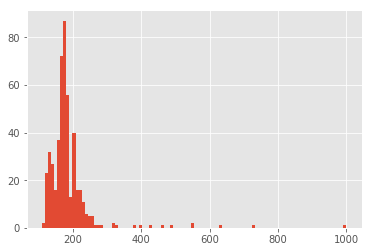

,endobs,fixjump,time_after_fixjump,len_ems,dur_ems
0,3701,3511,190,741,3705
5,3491,3321,170,699,3495
10,3519,3319,200,704,3520
15,3596,3456,140,720,3600
20,3615,3445,170,723,3615
25,3518,3318,200,704,3520
30,5170,5000,170,1035,5175
35,3558,3408,150,712,3560
40,4399,4199,200,880,4400
45,3483,3323,160,697,3485


In [97]:
# show eye-movement related colums of behavior data
print(data_df_org.keys())
data_df = data_df_org[data_df_org['order']==0]
data_df = data_df[['endobs', 'fixon', 'fixoff', 'stimon', 'fixjump', 'fixjump_pos', 'nsaccades', 'sactimes', 'sacdirs', 'sacamps', 'ems']]
data_df['len_ems'] = data_df['ems'].apply(lambda x: len(x[1]))
data_df['dur_ems'] = data_df['len_ems'] * 5
data_df['time_after_fixjump'] =  data_df['endobs'] - data_df['fixjump']


data_df['time_after_fixjump'].hist(bins=100)
plt.show()

data_df[['endobs', 'fixjump', 'time_after_fixjump', 'len_ems', 'dur_ems']].head(n=10)



# current understanding

* the ems columns contains all eye position data during obs period, sampled at 5 ms interval
* the obs end at 50 ~ 300 ms after fix jump, occurs, therefore not all eye position info is captured
